In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Go to Python folder to import routines
if os.getcwd() != r'C:\Users\Thomas\OneDrive\Bureau\Data_article_2024\Olivia': 
    os.chdir(r'C:\Users\Thomas\OneDrive\Bureau\Data_article_2024\Olivia')
print('Current directory: ', os.getcwd())
print('Python folders: ', [x for x in os.listdir() if '.' not in x])
# Import routines
from EffectiveMedia.GranularModels import Walton_modified
from Fluid.Gassmann import isoGassmann, fluidWood
from Hydro.hydro_models import Swe_from_wt_VG
from Utils.bounds import HillAvr
from Utils.elastic_param import Vp_from_K_G, Vs_from_G
def __Swe(Sw,Swr):
    return((Sw-Swr)/(1-Swr))
# Routine stair_case

Current directory:  C:\Users\Thomas\OneDrive\Bureau\Data_article_2024\Olivia
Python folders:  ['EffectiveMedia', 'Fluid', 'Hydro', 'Utils']


In [39]:
# Routine stair_case
def __function_staircase(depth,Vp,Vs,Rho,time): # permet de faire une fonction escalier type modèle de vitesse
    # Vp est un vecteur
    # Vs est un vecteur
    # Rho est une matrice
    # time est l'index de temps correspondant pour le modèle
    x=[]
    y=[]
    for i in range(depth.size-1):
        X=np.zeros(2)
        Y=np.zeros(2)
        X[:]=Vs_refz[i][time]
        Y[0]=depth[i]
        Y[1]=depth[i+1]
        x.append(X)
        y.append(Y)
    x=np.asarray(x)
    y=np.asarray(y)
    x=np.asarray(x).reshape(x.size)
    y=np.asarray(y).reshape(y.size)
    dVs=np.asarray(x)
    dVsdepth=np.asarray(y)
    x=[]
    y=[]
    for i in range(depth.size-1):
        X=np.zeros(2)
        Y=np.zeros(2)
        X[:]=Vp_refz[i][time]
        Y[0]=depth[i]
        Y[1]=depth[i+1]
        x.append(X)
        y.append(Y)
    x=np.asarray(x)
    y=np.asarray(y)
    x=np.asarray(x).reshape(x.size)
    y=np.asarray(y).reshape(y.size)
    dVp=np.asarray(x)
    dVpdepth=np.asarray(y)
    x=[]
    y=[]
    for i in range(depth.size-1):
        X=np.zeros(2)
        Y=np.zeros(2)
        X[:]=Rho[i,time]
        Y[0]=depth[i]
        Y[1]=depth[i+1]
        x.append(X)
        y.append(Y)
    x=np.asarray(x)
    y=np.asarray(y)
    x=np.asarray(x).reshape(x.size)
    y=np.asarray(y).reshape(y.size)
    dVrho=np.asarray(x)
    dVrhodepth=np.asarray(y)
    return(dVp,dVs,dVrho,dVrhodepth)

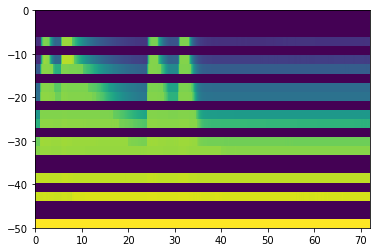

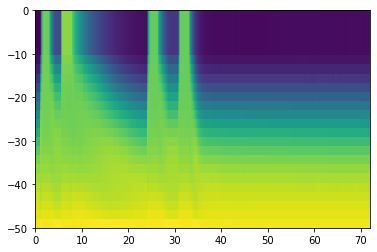

In [41]:
New_Depth=-np.arange(2,50,2)
Sw, Pw, Pf, depth = np.load(r'Saturation_Pw_Pf_depth_Clarisse2.npy',allow_pickle=True)
import numpy as np
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx
Sw_new=np.zeros((New_Depth.size,Sw[0].size))
for i in range(depth.size):
    idx=find_nearest(New_Depth,depth[i])
    Sw_new[idx]=Sw[i]
SS=Sw_new.copy()
plt.imshow(Sw_new,aspect='auto',extent=[0,72,-50,0])    
Sw_new[0]=Sw_new[4]
Sw_new[1]=Sw_new[4]
Sw_new[2]=Sw_new[4]
Sw_new[3]=Sw_new[4]
Sw_new[4]=Sw_new[4]

for i in range(25920):
    y = Sw[:,i]
    x = depth
    z = np.polyfit(x, y, 4)
    p = np.poly1d(z)
    j=p(New_Depth)
    Sw_new[:,i]=j

### Saturation extrapolation between - 9 and 0     
Sw_new[0]=Sw_new[4]
Sw_new[1]=Sw_new[4]
Sw_new[2]=Sw_new[4]
Sw_new[3]=Sw_new[4]


#Sw_new[-4]=Sw_new[-5]*1.0001
#Sw_new[-3]=Sw_new[-4]*1.0001
#Sw_new[-2]=Sw_new[-3]*1.0001
#Sw_new[-1]=Sw_new[-2]*1.0001

plt.figure()
plt.imshow(Sw_new,aspect='auto',extent=[0,72,-50,0])    


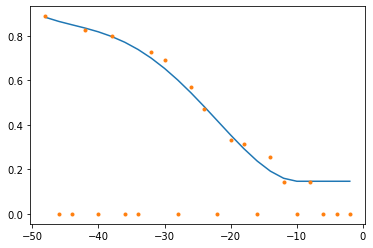

In [42]:
plt.plot(New_Depth,Sw_new[:,0])
y = Sw[:,i]
x = depth
z = np.polyfit(x, y, 2)
p = np.poly1d(z)
j=p(New_Depth)
plt.plot(New_Depth,SS[:,0],'.')

In [45]:
coeff_corr=0
Pf_depth=27+ coeff_corr     # Depth of Pf measurement
Pz_depth=52#   + coeff_corr    # Depth of Pz measurement
L_sand=58         # Sand width
correct=[]
for i in range(New_Depth.size):
    Sw, Pw, Pf, depth = np.load(r'C:\Users\Thomas\OneDrive\Bureau\Data_article_2024\Hydro/Saturation_Pw_Pf_depth.npy',allow_pickle=True)
    Sw=Sw_new
    depth=New_Depth#+ coeff_corr+1
    #depth-=coeff_corr
    Pw = Pw*1e-1 # kPa
    Pf = Pf*1e-1 # kPa
    PzR_depth=abs(depth[i])      # Depth of Pr_R to be recovered
    PiezoRef='Pz'
    # Compute Pw, the recovered pressur at depth z
    if PiezoRef=="Pz":
        print('La référence piezométrique est prise sur le capteur @',Pz_depth,'cm')
        i_piezo = np.argmax(abs(depth))#np.where(depth==np)[0][0] # indice de prof équivalent Pz/Sw, 48 etant le plus proche de 50
        Pw_z=Pw-0.098064*(Pz_depth-PzR_depth) # Calcul de la pression à la profondeur z à partir de Pz
    else:
        print('La référence piezométrique est prise sur le capteur @',Pf_depth,'cm')    
        i_piezo = find_nearest(depth, -Pf_depth) # indice de prof équivalent Pf/Sw
        Pw_z=Pf-0.098064*(Pf_depth-PzR_depth) # Calcul de la pression à la profondeur z à partir de Pf
        Pw_z=Pf-0.098064*(Pf_depth-PzR_depth) # Calcul de la pression à la profondeur z à partir de Pf

    i_piezof =find_nearest(depth, -Pf_depth) #np.where(depth==-Pf_depth)[0][0] # indice de prof équivalent Pf/Sw
    i_piezoR =find_nearest(depth, -PzR_depth) #np.where(depth==-PzR_depth)[0][0] # indice de prof équivalent Pz/Sw
    #print(i_piezoR,PzR_depth)

    #i_piezof = np.where(depth==-Pf_depth)[0][0] # indice de prof équivalent Pf/Sw
    SwPf = Sw[i_piezof,:]
    SwR = Sw[i_piezoR,:]
    # Check hydrostatic values for depth=28cm and depth=54cm
    rho_w = 1.0*1e3            # water density (kg/m3)
    g = 9.806                  # Earth’s gravitational acceleration (m.s^-2)
    z = np.array([Pf_depth,Pz_depth])*1e-2 # depth (m)
    Phydro = rho_w*g*z*1e-3    # computed hydrostatic pressure (kPa)
    # Mineral properties
    K_Qz = 44      #GPa (Barriere et al., GJI 2012) Shear Modulus solid
    G_Qz = 36      #GPa (Barriere et al., GJI 2012) Bulk Modulus solid
    rho_Qz = 2.65  #g/cc (Barriere et al., GJI 2012) density of quartz
    K_Ka = 1.5     #GPa  Bulk Modulus gaz
    G_Ka = 1.4     #GPa  Shear gaz
    rho_Ka = 1.58  #g/cc 1.58
    f_Qz = 1.0     #unitless 1.0

    # Fluid properties
    Kw = 2.5     #GPa 2.3 Barriere 
    rho_w = 1.0  #g/cc 1.0
    Ka = 1e-4    #GPa 1e-4
    rho_a = 1e-3 #g/cc 1e-3

    # Rock matrix properties
    phi = 0.4 #Porosity - measured (Barriere et al., GJI 2012)
    phi_0=0.38
    C0 = 6      #Coordination number in the high stress limit - Landes Sand (Barriere et al., GJI 2012)
    R = 2/5     #Walton friction parameter (Barriere et al., GJI 2012)
    P0 = 22     #Critical pressure for modified Walton model (MPa) - (Barriere et al., GJI 2012)
    Swr = 0.1  #Residual water saturation (to confirm with Thomas)
    Ks = HillAvr(K_Qz, f_Qz, K_Ka)        #GPa
    Gs = HillAvr(G_Qz, f_Qz, G_Ka)        #GPa
    rho_s = rho_Qz*f_Qz + (1-f_Qz)*rho_Ka #g/cc
    rho_f = SwR*rho_w + (1-SwR)*rho_a  #g/cc (fluid density at piezometer level) # Control Vs
    rho_f_full = Sw*rho_w + (1-Sw)*rho_a #g/cc
    Kf = fluidWood(SwR, Kw, Ka)         #GPa
    # Bulk density
    rho_sat = rho_s*(1-phi) + rho_f_full[i_piezof,:]*phi        #g/cc (fluid density at piezometer level)
    rho_satR = rho_s*(1-phi) + rho_f_full[i_piezoR,:]*phi        #g/cc (fluid density at piezometer level)
    rho_sat_full = rho_s*(1-phi) + rho_f_full*phi #g/cc 
    P=np.zeros([len(depth), Sw[0].size]) # matrice utilisée pour la pression de confirnement (overburden stress)
    prod_rhoDepth_min = np.zeros(np.shape(Sw))
    for i_depth in range(New_Depth.size):
        if i_depth == 0 :
            prod_rhoDepth_min[i_depth,:] = rho_sat_full[i_depth,:]*1e3*abs(depth[i_depth]-0)*1e-2  
            #print(depth[i_depth])
            P[i_depth,:]= prod_rhoDepth_min[i_depth,:]*g*1e-6
        else :
            prod_rhoDepth_min[i_depth,:] = rho_sat_full[i_depth,:]*1e3*abs(depth[i_depth]-depth[i_depth-1])*1e-2  #  * dz
            #prod_rhoDepth_min[i_depth,:] = rho_sat_full[i_depth,:]*1e3*abs(depth[i_depth])*1e-2  #  * dz

            P[i_depth,:]=np.sum(prod_rhoDepth_min[0:i_depth,:],axis=0)*g*1e-6 + P[0,:]

    # Effective pressure
    #-- Test Peff = P - Pf
    Peff = P[i_piezof,:] - Pf*1e-3  # effective pressure (MPa) Terzaghi @ 27cm (Peff=sigma-Pf)
    Peff2 = P[i_piezoR,:]  -__Swe(Sw[i_depth],Swr)*Pw_z*1e-3# effective pressure (MPa) used for the simple fluid substitution
    Peff_z = P[i_piezoR,:] - Pw_z*1e-3  # effective pressure (MPa) recovered at depth z # Il faut casser cette valeur par 3 pour tendre
    #Peff_z=(1-phi)*(rho_Qz-np.sum(Sw_new[0:i_depth])*1)*g*(abs(depth[i_depth]*10**-2))*1e-3
    #Peff_z=(1-phi)*(rho_Qz-np.sum(Sw_new[0:i_depth],0)/i_depth*1)*g*(abs(depth[i_depth]*10**-2))*1e-3

    # Vers des Vs acceptable.
    # Drained properties
    ### içi.
    Kdr, Gdr = Walton_modified(Ks, Gs, Peff, P0, phi=phi_0, C0=C0, R=R); # Biot-Gassman + Walton avec Pf
    Kdr2, Gdr2 = Walton_modified(Ks, Gs, Peff2, P0, phi=phi_0, C0=C0, R=R) # Biot Gassman substitution de fluide sans Pf
    Kdrz, Gdrz = Walton_modified(Ks, Gs, Peff_z, P0, phi=phi_0, C0=C0, R=R)# Biot-Gassman + Walton avec Pf recovered @ z
    # Saturated properties
    Ksat = isoGassmann(Kdr, Gdr, Ks, Kf, phi)
    Vp_sat = Vp_from_K_G(Ksat, Gdr, rho_sat)
    Vs_sat = Vs_from_G(Gdr, rho_sat)
    Ksat2 = isoGassmann(Kdr2[len(Kdr2)-10], Gdr2[len(Kdr2)-10], Ks, Kf, phi)
    Vp_sat2= Vp_from_K_G(Ksat2, Gdr2, rho_satR)
    Vs_sat2 = Vs_from_G(Gdr2, rho_satR)
    Ksatz = isoGassmann(Kdrz[len(Kdrz)-10], Gdrz[len(Kdrz)-10], Ks, Kf, phi) ### Pourquoi - 10? -- On s'en fou
    Vp_satz= Vp_from_K_G(Ksatz, Gdrz, rho_satR)
    Vs_satz = Vs_from_G(Gdrz, rho_satR)
    # Reference velocities (same as Thomas, avg of velocities between 2300 and 3000 min)
    t_ref1 = int(2300*60/10)
    t_ref2 = int(3000*60/10)
    Vp_ref = np.nanmean(Vp_sat[t_ref1:t_ref2]); #print('Vp_ref = {:.1f} m/s'.format(Vp_ref*1e3))
    Vs_ref = np.nanmean(Vs_sat[t_ref1:t_ref2]); #print('Vs_ref = {:.1f} m/s'.format(Vs_ref*1e3))
    Vp_ref2 = np.nanmean(Vp_sat2[t_ref1:t_ref2]); #print('Vp_ref2 = {:.1f} m/s'.format(Vp_ref2*1e3))
    Vs_ref2 = np.nanmean(Vs_sat2[t_ref1:t_ref2]); print('Vs_ref2 = {:.1f} m/s'.format(Vs_ref2*1e3))
    Vp_refz = np.nanmean(Vp_satz[t_ref1:t_ref2]); #print('Vp_refz = {:.1f} m/s'.format(Vp_refz*1e3))
    Vs_refz = np.nanmean(Vs_satz[t_ref1:t_ref2]); print('Vs_refz = {:.1f} m/s'.format(Vs_refz*1e3))
    #Biot-Gassman
    Kfr=0.02 # Frame modulus
    Gfr=0.0154 # shear frame modulus
    KsatB= isoGassmann(Kfr, Gfr, Ks, Kf, phi)
    Vp_satB=Vp_from_K_G(KsatB,Gfr,rho_satR)
    Vs_satB = Vs_from_G(Gfr, rho_satR)
    Vp_refB = np.mean(Vp_satB[t_ref1:t_ref2]); #print('Vp_refB = {:.1f} m/s'.format(Vp_refB*1e3))
    Vs_refB = np.mean(Vs_satB[t_ref1:t_ref2]); #print('Vs_refB = {:.1f} m/s'.format(Vs_refB*1e3))
    #### Uncomme
    #np.save(rf'C:\Hydro_modele\dv_compute\roflTest_Modeling_petro_{phi}1_cmInterp_SwPf_Phi_0v2_{PzR_depth}_{PiezoRef}__piezo_depth_{Pz_depth}_add_BG',[Vp_sat,Vs_sat,Vp_sat2,Vs_sat2,Vp_satz,Vs_satz,Vp_refB,Vs_refB,Vs_satB,rho_sat_full,Peff_z])

La référence piezométrique est prise sur le capteur @ 52 cm
Vs_ref2 = 71.5 m/s
Vs_refz = 73.8 m/s
La référence piezométrique est prise sur le capteur @ 52 cm
Vs_ref2 = 72.2 m/s
Vs_refz = 74.3 m/s
La référence piezométrique est prise sur le capteur @ 52 cm
Vs_ref2 = 72.9 m/s
Vs_refz = 74.9 m/s
La référence piezométrique est prise sur le capteur @ 52 cm
Vs_ref2 = 73.6 m/s
Vs_refz = 75.4 m/s
La référence piezométrique est prise sur le capteur @ 52 cm
Vs_ref2 = 74.3 m/s
Vs_refz = 75.9 m/s
La référence piezométrique est prise sur le capteur @ 52 cm
Vs_ref2 = 74.7 m/s
Vs_refz = 76.3 m/s
La référence piezométrique est prise sur le capteur @ 52 cm
Vs_ref2 = 75.1 m/s
Vs_refz = 76.4 m/s
La référence piezométrique est prise sur le capteur @ 52 cm
Vs_ref2 = 75.3 m/s
Vs_refz = 76.5 m/s
La référence piezométrique est prise sur le capteur @ 52 cm
Vs_ref2 = 75.4 m/s
Vs_refz = 76.5 m/s
La référence piezométrique est prise sur le capteur @ 52 cm
Vs_ref2 = 75.5 m/s
Vs_refz = 76.4 m/s
La référence piezomé